In [1]:
def calculate_stats(file_name):
    import numpy as np
    import csv
    
    info = []
    with open(file_name) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        for row in csv_reader:
            row = [float(x) for x in row]
            info.append(row)
    csv_file.close()
    
    info = np.array(info)
    shape = info.shape
    (num_of_exp, _) = shape
    
    if num_of_exp > 100:
        info = info[:100]
    
    print(info.shape)
        
    mean = np.mean(info, axis=0)
    std = np.std(info, axis=0)
    mean = np.array([round(x, 4) for x in mean])
    std = np.array([round(x, 3) for x in std])
    
    for i in range(len(mean)):
        print(mean[i], std[i])
    
    return (mean, std)

In [10]:
import time, threading
from IPython.display import clear_output

def monitor():
    clear_output()
    print(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime(time.time()+(3600*8))))
    file_name = 'test.csv'
    calculate_stats(file_name)
#     threading.Timer(10, monitor).start()

monitor()

2019-10-19 12:24:46
(100, 6)
227.0 0.0
273.0 0.0
99.16 22.821
114.03 29.648
0.6395 0.089
0.7582 0.212


In [43]:
def calculate_stats_iqr(file_name):
    import numpy as np
    import csv
    
    info = []
    with open(file_name) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        for row in csv_reader:
            row = [float(x) for x in row]
            info.append(row)
    csv_file.close()
    
    info = np.array(info)
    shape = info.shape
    (num_of_exp, _) = shape
    
    if num_of_exp > 100:
        info = info[:100]
    
    mean = np.mean(info, axis=0)
    std = np.std(info, axis=0)
    mean = np.array([round(x, 4) for x in mean])
    std = np.array([round(x, 3) for x in std])

    iqr_infos = []
    for iqr in [0, 0.25, 0.5, 0.75, 1]:
        iqr_info = [round(x, 4) for x in np.quantile(info, iqr, interpolation='midpoint', axis=0)]
        iqr_infos.append(iqr_info)
        
    return iqr_infos

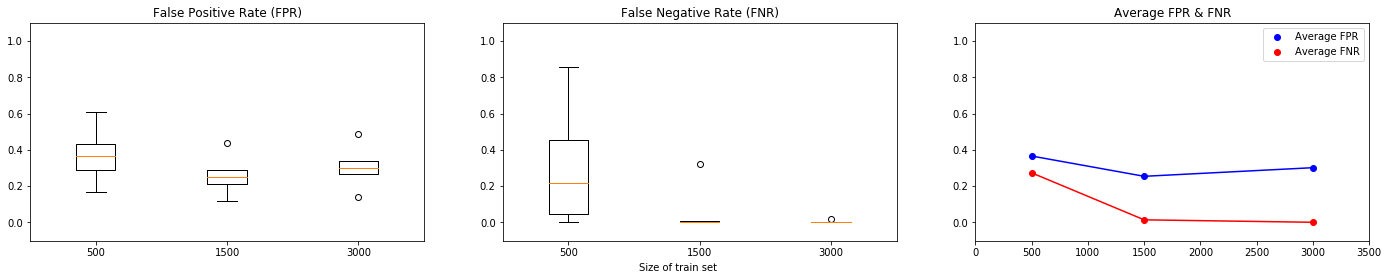

In [68]:
import numpy as np
file_names = ['Arch_4_Layer_Input_Proper_500_none.csv', 
              'Arch_4_Layer_Input_Proper_1500_none.csv', 
              'Arch_4_Layer_Input_Proper_3000_none.csv']


iqr_infos_list = []
for file_name in file_names:
    iqr_infos_list.append(calculate_stats_iqr(file_name))
    
iqr_infos_list = np.array(iqr_infos_list)

'''
Distribution iqr 
'''
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(24, 4))
fig.text(0.5, 0.02, 'Size of train set', ha='center')

x = [500, 1500, 3000] # Hyperparameters
axis = [0, 3500, -0.1, 1.1]

plt.subplot(1, 3, 1)
data = list(iqr_infos_list[:, :, 4])
data = [(1-x) for x in data]
plt.boxplot(data, labels=['500', '1500', '3000'])
plt.title('False Positive Rate (FPR)') # Hyperparameters
# plt.axis(axis)
plt.ylim(-0.1, 1.1)

plt.subplot(1, 3, 2)
data = list(iqr_infos_list[:, :, 5])
data = [(1-x) for x in data]
plt.boxplot(data, labels=['500', '1500', '3000'])
plt.title('False Negative Rate (FNR)') # Hyperparameters
# plt.axis(axis)
plt.ylim(-0.1, 1.1)

'''
Average Curve
'''
benign_means, benign_stds = [], []
adv_means, adv_stds = [], []
for file_name in file_names:
    (mean, std) = calculate_stats(file_name)
    benign_means.append(mean[4])
    benign_stds.append(std[4])
    adv_means.append(mean[5])
    adv_stds.append(std[5])    

ys = [benign_means, adv_means]
titles = ['Average FPR', 'Average FNR'] # Hyperparameters

plt.subplot(1, 3, 3)
for idx, (y, title) in enumerate(zip(ys, titles)):
    y = [(1-i) for i in y]
    if idx == 0:
        plt.plot(x, y, 'bo')
    else:
        plt.plot(x, y, 'ro')

for idx, (y, title) in enumerate(zip(ys, titles)):
    y = [(1-i) for i in y]
    if idx == 0:
        plt.plot(x, y, 'b')
    else:
        plt.plot(x, y, 'r')
    
plt.legend(titles, loc='upper right')
plt.axis(axis)
plt.title('Average FPR & FNR') # Hyperparameters
# plt.show()
plt.savefig('exp2_4.png')